In [58]:
import pandas as pd
import numpy as np
import pickle

In [29]:
total_crop_dataset = pd.read_csv('../crop_production.csv')

In [30]:
rajasthan = total_crop_dataset[total_crop_dataset['State_Name']=='Rajasthan']

In [31]:
rajasthan.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
164440,Rajasthan,AJMER,1997,Kharif,Bajra,56600.0,30400.0
164441,Rajasthan,AJMER,1997,Kharif,Cotton(lint),16000.0,31176.0
164442,Rajasthan,AJMER,1997,Kharif,Groundnut,7800.0,5100.0
164443,Rajasthan,AJMER,1997,Kharif,Jowar,105900.0,34600.0
164444,Rajasthan,AJMER,1997,Kharif,Maize,43600.0,33100.0


In [32]:
rajasthan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12514 entries, 164440 to 176953
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     12514 non-null  object 
 1   District_Name  12514 non-null  object 
 2   Crop_Year      12514 non-null  int64  
 3   Season         12514 non-null  object 
 4   Crop           12514 non-null  object 
 5   Area           12514 non-null  float64
 6   Production     12066 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 782.1+ KB


In [33]:
rajasthan.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       448
dtype: int64

In [34]:
rajasthan = rajasthan.dropna()

In [35]:
rajasthan['District_Name'].nunique()

33

In [36]:
rajasthan_filtered = rajasthan[
    (rajasthan['Crop']=='Wheat') | 
    (rajasthan['Crop']=='Rice')  |
    (rajasthan['Crop']=='Jowar')  |
    (rajasthan['Crop']=='Bajra')  |
    (rajasthan['Crop']=='Cardamom')  |
    (rajasthan['Crop']=='Garlic')  |
    (rajasthan['Crop']=='Turmeric')  |
    (rajasthan['Crop']=='Ginger')  |
    (rajasthan['Crop']=='Cotton(lint)')  |
    (rajasthan['Crop']=='Linseed')  |
    (rajasthan['Crop']=='Sesamum')  |
    (rajasthan['Crop']=='Coconut ')  |
    (rajasthan['Crop']=='Onion')  |
    (rajasthan['Crop']=='Arhar/Tur')  |
    (rajasthan['Crop']=='Potato')  |
    (rajasthan['Crop']=='Maize')  
]

In [37]:
rajasthan_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4684 entries, 164440 to 176953
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     4684 non-null   object 
 1   District_Name  4684 non-null   object 
 2   Crop_Year      4684 non-null   int64  
 3   Season         4684 non-null   object 
 4   Crop           4684 non-null   object 
 5   Area           4684 non-null   float64
 6   Production     4684 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 292.8+ KB


In [55]:
rajasthan_filtered.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [38]:
rajasthan_filtered_ohe = pd.get_dummies(rajasthan_filtered, columns=['District_Name', 'Season','Crop'],drop_first=True)

In [39]:
rajasthan_filtered_ohe.head()

,State_Name,Crop_Year,Area,Production,District_Name_ALWAR,District_Name_BANSWARA,District_Name_BARAN,District_Name_BARMER,District_Name_BHARATPUR,District_Name_BHILWARA,...,Crop_Garlic,Crop_Jowar,Crop_Linseed,Crop_Maize,Crop_Onion,Crop_Potato,Crop_Rice,Crop_Sesamum,Crop_Turmeric,Crop_Wheat
164440,Rajasthan,1997,56600.0,30400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164441,Rajasthan,1997,16000.0,31176.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164443,Rajasthan,1997,105900.0,34600.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
164444,Rajasthan,1997,43600.0,33100.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
164445,Rajasthan,1997,2800.0,4500.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
rajasthan_filtered_ohe.columns

Index(['State_Name', 'Crop_Year', 'Area', 'Production', 'District_Name_ALWAR',
       'District_Name_BANSWARA', 'District_Name_BARAN', 'District_Name_BARMER',
       'District_Name_BHARATPUR', 'District_Name_BHILWARA',
       'District_Name_BIKANER', 'District_Name_BUNDI',
       'District_Name_CHITTORGARH', 'District_Name_CHURU',
       'District_Name_DAUSA', 'District_Name_DHOLPUR',
       'District_Name_DUNGARPUR', 'District_Name_GANGANAGAR',
       'District_Name_HANUMANGARH', 'District_Name_JAIPUR',
       'District_Name_JAISALMER', 'District_Name_JALORE',
       'District_Name_JHALAWAR', 'District_Name_JHUNJHUNU',
       'District_Name_JODHPUR', 'District_Name_KARAULI', 'District_Name_KOTA',
       'District_Name_NAGAUR', 'District_Name_PALI',
       'District_Name_PRATAPGARH', 'District_Name_RAJSAMAND',
       'District_Name_SAWAI MADHOPUR', 'District_Name_SIKAR',
       'District_Name_SIROHI', 'District_Name_TONK', 'District_Name_UDAIPUR',
       'Season_Rabi       ', 'Season_W

In [40]:
X = rajasthan_filtered_ohe.drop(['State_Name','Crop_Year','Production'],axis=1).values

In [41]:
y = rajasthan_filtered_ohe.iloc[:,3].values

In [42]:
y

array([3.0400e+04, 3.1176e+04, 3.4600e+04, ..., 3.6000e+01, 7.0000e+00,
       9.5000e+01])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
from sklearn.linear_model import LinearRegression,Lasso
linear_regression = LinearRegression()
lasso = Lasso()

In [46]:
linear_regression.fit(X_train,y_train)
lasso.fit(X_train,y_train)

C:\Users\CHATANAYA\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306339420072.41797, tolerance: 3289392863.158283
  positive)


Lasso()

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()

In [48]:
rfregressor.fit(X_train,y_train)

RandomForestRegressor()

In [49]:
y_pred = rfregressor.predict(X_test)

In [50]:
accuracy = rfregressor.score(X_test,y_test)
print(accuracy*100,'%')

88.54846835422731 %


In [51]:
accuracy = linear_regression.score(X_test,y_test)
print(accuracy*100,'%')

65.34606189694398 %


In [52]:
accuracy = lasso.score(X_test,y_test)
print(accuracy*100,'%')

65.34033486131274 %


In [59]:
filename = 'Rajasthan_Model.sav'
pickle.dump(rfregressor, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.8854846835422732

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

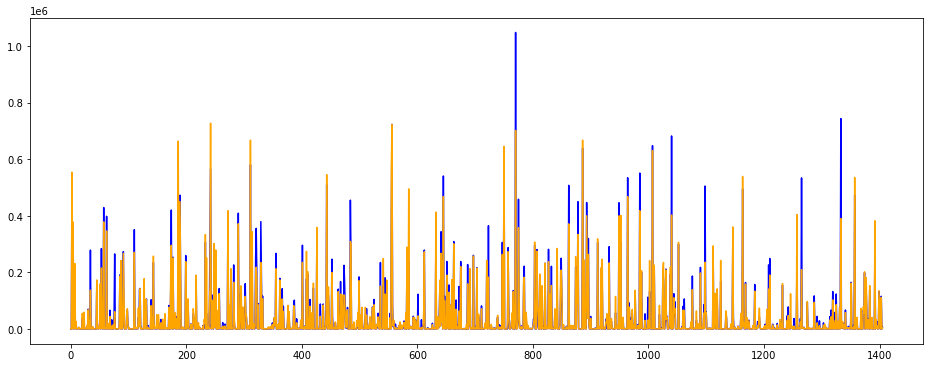

In [54]:
plt.figure(figsize=(16,6))
plt.plot(y_test,color='blue')
plt.plot(y_pred,color='orange')